In [134]:
import pandas as pd
import numpy as np
from pybaseball import statcast_pitcher
from pybaseball import playerid_lookup
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
plt.style.use('seaborn')

font = {'family' : 'consolas',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

In [163]:
playerid_lookup('Pressly')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,pressly,austin,-1,NaN,NaN,-1,NaN,NaN
1,pressly,buck,-1,NaN,NaN,-1,NaN,NaN
2,pressly,ryan,519151,presr001,pressry01,7005,2013.0,2019.0


In [164]:
data = statcast_pitcher('2018-02-01', '2019-07-27', player_id = 519151)

Gathering Player Data


In [14]:
data

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2019-07-26,90.4,2.4508,5.4437,Hyun-Jin Ryu,594809,547943,single,hit_into_play_score,...,0,1,0,1,1,0,0,1,Standard,Standard
1,CU,2019-07-26,72.6,2.2713,5.7231,Hyun-Jin Ryu,594809,547943,NaN,ball,...,0,1,0,1,1,0,0,1,Standard,Standard
2,CH,2019-07-26,80.4,2.6635,5.4019,Hyun-Jin Ryu,594809,547943,NaN,foul,...,0,1,0,1,1,0,0,1,Standard,Standard
3,FC,2019-07-26,86.5,2.4899,5.6115,Hyun-Jin Ryu,594809,547943,NaN,foul,...,0,1,0,1,1,0,0,1,Standard,Standard
4,FF,2019-07-26,91.4,2.4637,5.5296,Hyun-Jin Ryu,594809,547943,NaN,foul,...,0,1,0,1,1,0,0,1,Strategic,Standard
5,FF,2019-07-26,91.7,2.4225,5.5225,Hyun-Jin Ryu,594809,547943,NaN,foul,...,0,1,0,1,1,0,0,1,Strategic,Standard
6,CH,2019-07-26,81.3,2.7184,5.4711,Hyun-Jin Ryu,594809,547943,NaN,foul,...,0,1,0,1,1,0,0,1,Strategic,Standard
7,FF,2019-07-26,92.0,2.4613,5.6587,Hyun-Jin Ryu,594809,547943,NaN,ball,...,0,1,0,1,1,0,0,1,Strategic,Standard
8,CU,2019-07-26,77.6,2.1666,5.7381,Hyun-Jin Ryu,594809,547943,NaN,ball,...,0,1,0,1,1,0,0,1,Strategic,Standard
9,FF,2019-07-26,92.5,2.4658,5.6081,Hyun-Jin Ryu,594809,547943,NaN,foul_tip,...,0,1,0,1,1,0,0,1,Strategic,Standard


In [165]:
pitch_dict = {}
for idx, df in data.groupby('pitch_type'):
    pitch_dict[idx] = df

In [166]:
daily_list = []
for date, df in data.groupby('game_date'):
    daily_dict = {}
    daily_dict['date'] = date
    daily_dict['pitch_breakdown'] = df.pitch_type.value_counts()
    daily_list.append(daily_dict)

In [167]:
agg_df = pd.DataFrame()
for date, df in data.groupby('game_date'):
    daily_df = pd.DataFrame(df.pitch_type.value_counts()).transpose().reset_index()
    daily_df['date'] = date
    agg_df = pd.concat([agg_df, daily_df], axis=0)

c:\users\hjunk\anaconda3\envs\henv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [168]:
agg_df

,CU,FF,FT,SL,date,index
0,8.0,10.0,3.0,9.0,2018-03-31,pitch_type
0,9.0,5.0,1.0,3.0,2018-04-05,pitch_type
0,1.0,10.0,2.0,1.0,2018-04-07,pitch_type
0,3.0,5.0,2.0,3.0,2018-04-09,pitch_type
0,2.0,4.0,1.0,3.0,2018-04-10,pitch_type
0,3.0,7.0,1.0,5.0,2018-04-12,pitch_type
0,NaN,NaN,NaN,NaN,2018-04-18,pitch_type
0,6.0,10.0,NaN,6.0,2018-04-20,pitch_type
0,4.0,10.0,1.0,6.0,2018-04-22,pitch_type
0,2.0,8.0,1.0,7.0,2018-04-24,pitch_type


In [169]:
agg_df = agg_df.set_index('date').drop('index', axis=1)

In [170]:
agg_df['total'] = agg_df.sum(axis=1)
agg_df = agg_df[agg_df.index > '2019-02-05']

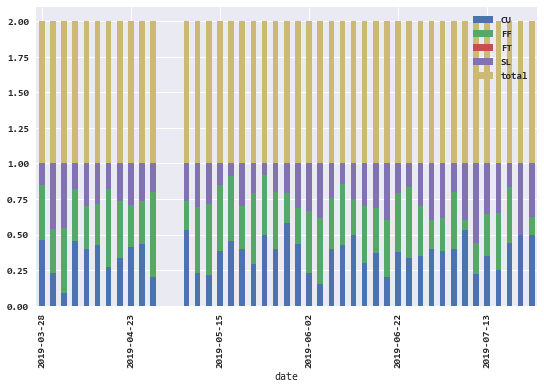

In [171]:
ax = agg_df.iloc[:, 0:5].div(agg_df.total, axis=0).plot.bar(stacked=True, linewidth=0)
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
locs, labels = plt.xticks()

Text(0.5,1,"Pressly's pitch repetoire in 2019 season \nin each game")

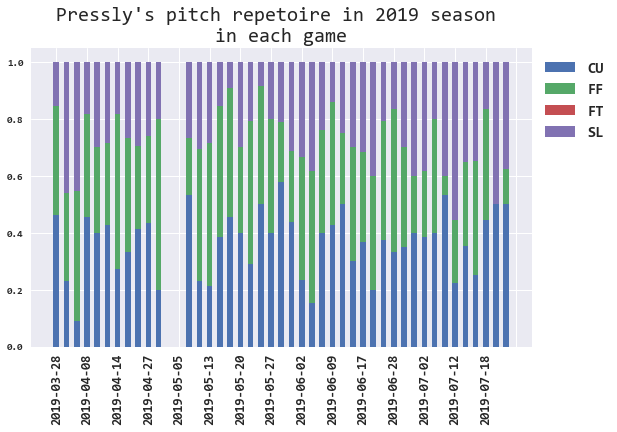

In [184]:
fig, ax = plt.subplots()

ind = agg_df.index
width = 0.55
barp1 = ax.bar(ind, agg_df.iloc[:, 0].div(agg_df.total, axis=0).values, width)
barp2 = ax.bar(ind, agg_df.iloc[:, 1].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:1].sum(axis=1).div(agg_df.total, axis=0).values)
barp3 = ax.bar(ind, agg_df.iloc[:, 2].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:2].sum(axis=1).div(agg_df.total, axis=0).values)
barp4 = ax.bar(ind, agg_df.iloc[:, 3].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:3].sum(axis=1).div(agg_df.total, axis=0).values)
#barp5 = ax.bar(ind, agg_df.iloc[:, 4].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:4].sum(axis=1).div(agg_df.total, axis=0).values)
#barp6 = ax.bar(ind, agg_df.iloc[:, 5].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:5].sum(axis=1).div(agg_df.total, axis=0).values)
#barp7 = ax.bar(ind, agg_df.iloc[:, 6].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 0:6].sum(axis=1).div(agg_df.total, axis=0).values, color = 'cyan')

ax.legend((barp1[0], barp2[0], barp3[0], barp4[0]), ('CU', 'FF', 'FT', 'SL'), loc = 'best', bbox_to_anchor=(1, 1), prop={'size': 15})
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xticks(rotation='vertical', size=13)
ax.set_title("Pressly's pitch repetoire in 2019 season \nin each game", size=20)

#line = ax.plot(ind, agg_df.iloc[:, 0:3].sum(axis=1).div(agg_df.total, axis=0).values, c= 'red')
# 구속 순으로 보여주고, 비슷한 공끼리는 비슷한 색을 보여주도록

#ind = np.arange(N)
#fig, ax = plt.subplots()
#rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

#womenMeans = (25, 32, 34, 20, 25)
#womenStd = (3, 5, 2, 3, 3)

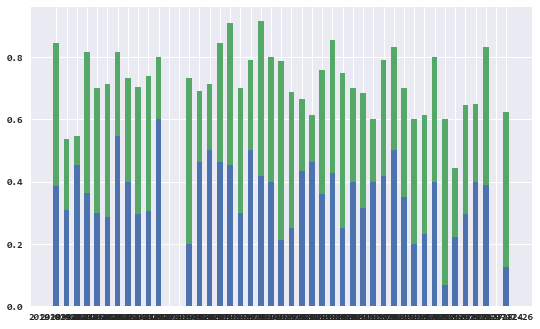

In [178]:
fig, ax = plt.subplots()

ind = agg_df.index
width = 0.55
barp1 = ax.bar(ind, agg_df.iloc[:, 1].div(agg_df.total, axis=0).values, width)
barp2 = ax.bar(ind, agg_df.iloc[:, 0].div(agg_df.total, axis=0).values, width, bottom=agg_df.iloc[:, 1].div(agg_df.total, axis=0).values)

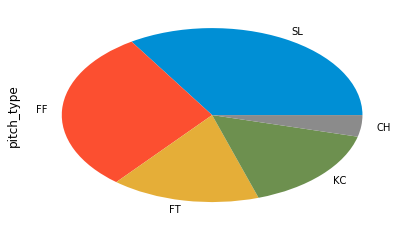

In [24]:
data[data.events == 'strikeout'].pitch_type.value_counts().plot.pie()

In [148]:
agg_df.iloc[:, 0:6].sum(axis=1).div(agg_df.total, axis=0).values

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [173]:
agg_df

,CU,FF,FT,SL,total
date,,,,,
2019-03-28,6.0,5.0,NaN,2.0,13.0
2019-04-01,3.0,4.0,NaN,6.0,13.0
2019-04-05,1.0,5.0,NaN,5.0,11.0
2019-04-08,5.0,4.0,NaN,2.0,11.0
2019-04-10,8.0,6.0,NaN,6.0,20.0
2019-04-13,6.0,4.0,NaN,4.0,14.0
2019-04-14,3.0,6.0,NaN,2.0,11.0
2019-04-21,5.0,6.0,NaN,4.0,15.0
2019-04-23,7.0,5.0,NaN,5.0,17.0


In [79]:
agg_df.iloc[:, 0:7]

,CH,CU,EP,FC,FF,FT,SL
date,,,,,,,
2018-04-02,11,13,NaN,17,8,19.0,6.0
2018-04-10,14,14,NaN,25,27,9.0,1.0
2018-04-16,12,13,NaN,17,35,16.0,NaN
2018-04-21,19,16,NaN,28,15,10.0,1.0
2018-04-27,17,15,NaN,16,29,7.0,5.0
2018-05-02,6,5,1.0,8,9,1.0,NaN
2018-08-15,9,19,NaN,28,32,1.0,NaN
2018-08-21,12,17,NaN,19,21,2.0,1.0
2018-08-26,11,23,NaN,20,31,1.0,NaN
